In [1]:
import qiskit

versions = qiskit.__qiskit_version__

for version in versions:
    print(f"{version}: {versions[version]}")

qiskit-terra: 0.21.1
qiskit-aer: 0.10.4
qiskit-ignis: None
qiskit-ibmq-provider: 0.19.2
qiskit: 0.37.1
qiskit-nature: None
qiskit-finance: None
qiskit-optimization: None
qiskit-machine-learning: None


## Let's get started

In [15]:
%%bash
ls -a

.
..
ibmqpitoken.txt
.ipynb_checkpoints
main.ipynb
refs
silver


In [25]:
from qiskit import IBMQ
apitoken = open("ibmqpitoken.txt", "rt")
IBMQ.save_account(apitoken.read())
IBMQ.load_account()

configrc.store_credentials:WARNING:2022-10-23 13:20:05,954: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2022-10-23 13:20:08,631: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

# Two qubits |0> and |1> with superposition

In [2]:
import numpy as np
from math import sqrt, pow

a = sqrt(1/2)
b= sqrt(1/2)

if round(pow(a,2)+ pow(b,2), 0) != 1:
    print("your qubits parameters are not normalized")
    a = sqrt(1/2)
    b = sqrt(1/2)
bits = {"bit = 0": np.array([0,1]), "bit = 1": np.array([1,0]), "|0\u27E9":np.array([1,0]),
"|1\u27E9":np.array([0,1]),
"a|0\u27E9+b|1\u27E9":np.array([a,b])}

for bit in bits:
    print(f"{bit} : {bits[bit].round(3)} ")
print("\n")
    


bit = 0 : [0 1] 
bit = 1 : [1 0] 
|0⟩ : [1 0] 
|1⟩ : [0 1] 
a|0⟩+b|1⟩ : [0.707 0.707] 




# Probability of getting 0 or 1

In [3]:
print(" 'Measuring' bits and qubits ")
prob={}
for b in bits:
    print(b)
    for d in range(len(bits[b])):
        prob[b] = pow(bits[b][d],2)
        print(d, " = ", '%.2f' %(prob[b]*100), "percent")
    print("\n")
    

 'Measuring' bits and qubits 
bit = 0
0  =  0.00 percent
1  =  100.00 percent


bit = 1
0  =  100.00 percent
1  =  0.00 percent


|0⟩
0  =  100.00 percent
1  =  0.00 percent


|1⟩
0  =  0.00 percent
1  =  100.00 percent


a|0⟩+b|1⟩
0  =  50.00 percent
1  =  50.00 percent




# Ploting a qubit in bloch sphere

In [4]:
from qiskit.visualization import plot_bloch_vector
import cmath
from math import pi, cos, sin

angles = {"theta":pi, "phi":0}

angles["theta"] = pi*float(input("theta\n:"))
angles["phi"] = pi*float(input("phi\n:"))

qbits = { "bit = 0":{"theta": 0, "phi": 0},
       "bit = 1": {"theta": pi, "phi": 0},
       "|0\u27E9": {"theta": 0, "phi": 0},
       "|1\u27E9": {"theta": pi, "phi": 0},
        "a|0\u27E9 + b|1\u27E9": angles}
for b in qbits:
    print( f"{b}: {qbits[b]} ")

theta
:2
phi
:0
bit = 0: {'theta': 0, 'phi': 0} 
bit = 1: {'theta': 3.141592653589793, 'phi': 0} 
|0⟩: {'theta': 0, 'phi': 0} 
|1⟩: {'theta': 3.141592653589793, 'phi': 0} 
a|0⟩ + b|1⟩: {'theta': 6.283185307179586, 'phi': 0.0} 


# construct the bloch vector
$ [\cos(\phi)\sin(\theta), \sin(\phi)\sin(\theta), \cos(\theta)] $

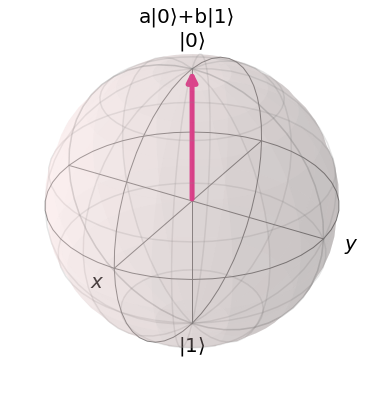

State vector: [1.+0.j 0.+0.j]


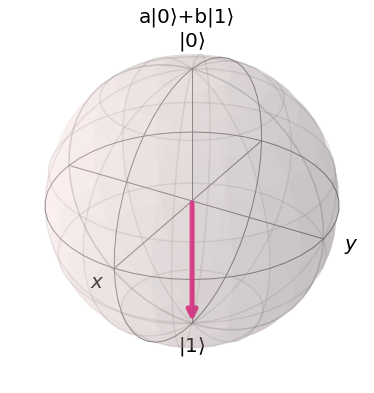

State vector: [0.+0.j 1.+0.j]


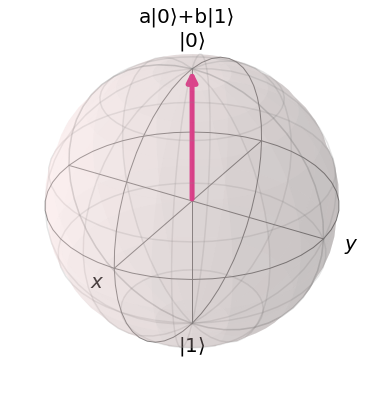

State vector: [1.+0.j 0.+0.j]


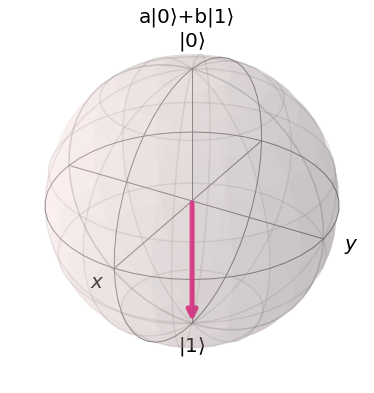

State vector: [0.+0.j 1.+0.j]


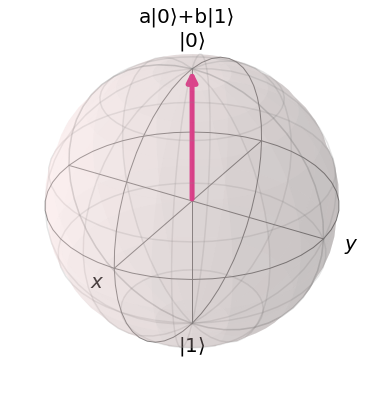

State vector: [-1.+0.j  0.+0.j]


In [5]:
for q in qbits:
    bloch = [cos(qbits[q]["phi"])*sin(qbits[q]["theta"]), sin(qbits[q]["phi"])*sin(qbits[q]["theta"]), cos(qbits[q]["theta"])]
    display(plot_bloch_vector(bloch, title=bit))
    # Build the state vector
    a = cos(qbits[q]["theta"]/2)
    b = cmath.exp(qbits[q]["phi"]*1j)*sin(qbits[q]["theta"]/2)
    state_vector = [a * complex(1, 0), b * complex(1, 0)]
    print("State vector:", np.around(state_vector,
    decimals = 3))

# Let's plot the state vector that point to my home town!

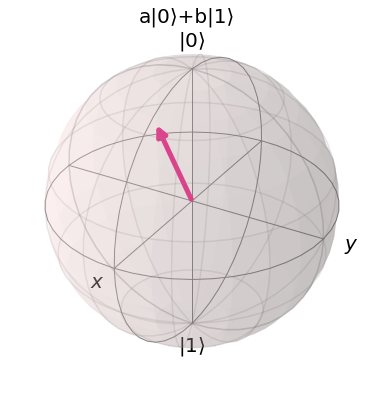

In [7]:
#32°40'12.3"N 4°57'19.3"W
qtheta = 32*pi/180
qphi = 4*pi/180

qhome = [cos(qphi)*sin(qtheta), sin(qphi)*sin(qtheta), cos(qtheta)]
display(plot_bloch_vector(qhome, title=bit))

## Quantum gates

Identitiy gate : $ \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$

X-gate : $ \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$

H-gate ( or Hadamard) : $ \sqrt{2}\begin{bmatrix} 1 & -1 \\ 1 & -1 \end{bmatrix}$